## Multi-Layer Perceptron (MLP)

![Multi-Layer Perceptron (MLP)](https://media.geeksforgeeks.org/wp-content/uploads/nodeNeural.jpg)

---
---
![neuron_model](https://www.cs.toronto.edu/~lczhang/360/lec/w02/imgs/neuron_model.jpeg)

---

The Multilayer Perceptron (MLP) is a type of feedforward artificial neural network that consists of multiple layers of nodes, also known as neurons. Here's a breakdown:

- **Architecture**: An MLP typically consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of multiple neurons, and each neuron in one layer is connected to every neuron in the adjacent layers.

- **Activation Function**: Neurons in each layer (except the input layer) apply an activation function to their input to introduce non-linearity into the network. Common activation functions include sigmoid, tanh, ReLU, and softmax.

- **Feedforward Operation**: During the feedforward operation, the input data is passed through the network layer by layer. The output of each layer serves as the input to the next layer, and this process continues until the output layer is reached, producing the final prediction.

- **Training**: MLPs are trained using supervised learning techniques such as backpropagation and gradient descent. During training, the network adjusts its weights and biases iteratively to minimize a loss function, typically based on the discrepancy between predicted and actual outputs.

- **Applications**: MLPs are used in various applications, including classification, regression, pattern recognition, and function approximation. They have been successfully applied in areas such as image recognition, natural language processing, and financial forecasting.

MLPs are versatile and powerful models capable of learning complex patterns in data, making them one of the fundamental building blocks of deep learning.


In [1]:
# Important lib
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import torch

#### Explanation of `random.uniform(-1,1)`

The `random.uniform()` function in Python's `random` module generates random floating-point numbers within a specified range. Here's a breakdown:

- **Function**: `random.uniform()`
- **Parameters**: The function takes two parameters: `a` and `b`, representing the lower and upper bounds of the range from which random numbers will be generated.
- **Range**: The function generates random floating-point numbers uniformly distributed between `a` and `b`, inclusive of `a` but exclusive of `b`.
- **Example**: `random.uniform(-1,1)` generates random numbers between -1 (inclusive) and 1 (exclusive), meaning the numbers can be any value within the interval [-1, 1), including -1 but not including 1.

This function is commonly used in various applications, including generating initial weights for neural networks and implementing various statistical simulations.


In [2]:
random.uniform(-1,1)

0.543045045937409

In [3]:
[random.uniform(-1,1) for _ in range(5)]

[-0.1360362333236096,
 0.8845403902641489,
 0.06797862977821811,
 -0.289456137994337,
 -0.014659348613420109]

---

### `__call__` Method

The `__call__` method in Python is a special method that allows instances of a class to be called as if they were functions. Here's a breakdown:

- **Usage**: The `__call__` method is invoked when an instance of a class is used with function-call syntax, i.e., `instance()`.
  
- **Functionality**: The purpose of the `__call__` method is to define what happens when an instance of the class is called. It allows the object to behave like a function, executing custom logic defined within the method.

- **Flexibility**: By implementing the `__call__` method in a class, you can customize the behavior of instances and make them callable, enabling them to perform specific actions when invoked.

- **Example**: Suppose you have a class named `MyFunction` with a `__call__` method defined. When you create an instance of `MyFunction` and call it with parentheses, the `__call__` method will be executed, allowing you to define custom behavior for the instance.

- **Applications**: The `__call__` method is commonly used in various scenarios, such as creating callable objects, implementing function-like behavior for classes, and defining function decorators.


In [4]:
# eg
class Multiplier:
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, x):
        return x * self.factor

# Create an instance of Multiplier with a factor of 2
double = Multiplier(2)

# Call the instance as if it were a function
result = double(5)  # This will multiply 5 by 2
print(result)  # Output: 10


10


### Explanation of `zip()` Function

The `zip()` function in Python is used to combine multiple iterable objects (such as lists, tuples, or strings) element-wise into tuples. Here's a breakdown:

- **Usage**: The `zip()` function takes in one or more iterable objects and returns an iterator that generates tuples containing elements from each iterable.

- **Functionality**: When `zip()` is called, it iterates through the provided iterables in parallel, creating tuples where the i-th element of each iterable is paired together. If the iterables are of different lengths, `zip()` stops when the shortest iterable is exhausted.

- **Flexibility**: The `zip()` function is versatile and can be used to combine elements from different data structures, making it useful for tasks such as iterating over multiple lists simultaneously or pairing keys and values from dictionaries.

- **Example**: Suppose we have two lists, `names` and `ages`, containing names and corresponding ages. We can use `zip()` to pair each name with its corresponding age, creating a list of tuples.

    ```python
    # Example usage of zip()
    names = ['Alice', 'Bob', 'Charlie']
    ages = [30, 25, 35]

    # Pair each name with its corresponding age using zip()
    name_age_pairs = list(zip(names, ages))
    print(name_age_pairs)
    # Output: [('Alice', 30), ('Bob', 25), ('Charlie', 35)]
    ```

In this example:
- We have two lists, `names` and `ages`, representing names and ages, respectively.
- We use `zip(names, ages)` to pair each name with its corresponding age.
- The resulting list of tuples, `name_age_pairs`, contains tuples where each tuple contains a name and its corresponding age.


In [5]:
names = ['Alice', 'Bob', 'Charlie']
ages = [30, 25, 35]

# Pair each name with its corresponding age using zip()
name_age_pairs = list(zip(names, ages))
print(name_age_pairs)

[('Alice', 30), ('Bob', 25), ('Charlie', 35)]


---
---
---

In [6]:
class Value:
    
    def __init__( self, data, _children=(), _operation='', label='' ):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _operation
        self._backward = lambda: None 
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        otherObj = otherObj if isinstance(otherObj, Value) else Value(otherObj)
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        def _backward():
            self.grad += 1.0 * out.grad
            otherObj.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
    
    def __radd__(self, otherObj):
        return self+otherObj
    
    # -self
    def __neg__(self): 
        # here we are using multiplication method for subtraction
        return self * (-1)
    
    # self - otherObj
    def __sub__(self, otherObj):
        # here we are using addition and negation method for subtraction
        return self + (-otherObj)
    
    def __mul__(self, otherObj):
        otherObj = otherObj if isinstance(otherObj, Value) else Value(otherObj)
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        def _backward():
            self.grad += otherObj.data * out.grad
            otherObj.grad += self.data * out.grad
        out._backward = _backward 
        return out
    
    # otherObj * self
    def __rmul__(self, otherObj): 
        return self*otherObj
    
    # self/otherObj
    def __truediv__(self, otherObj): 
        return self * (otherObj**(-1))
    
    # self**otherObj
    def __pow__(self, otherObj): 
        assert isinstance(otherObj, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** otherObj, (self, ), f"**{otherObj}")
        def _backward():
             self.grad += (otherObj * self.data**(otherObj-1)) * out.grad
        out._backward = _backward 
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward 
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward 
        return out
        
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0 
        for node in reversed(topo):
            node._backward()

In [7]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right, TB = Top to Bottom

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
        if n._op:
            # if this value is result of some operation , create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        # connect n1 node to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

## Neuron

In [8]:
class Neuron:
    
    # nin - no. of inputs
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] 
        self.b = Value(np.random.uniform(-1,1))
        
    def __call__(self, x):
        # (w * x) + b
        print(list(zip(self.w, x)))
        return 0.0

In [9]:
# inputs - 2
x = [2.0,3.0]
# Neuron object with 2 inputs
n = Neuron(2)
# call like a function by passing inputs
n(x)

[(Value(data=0.502514166664368), 2.0), (Value(data=0.43965088240158146), 3.0)]


0.0

---

![neuron_model](https://www.cs.toronto.edu/~lczhang/360/lec/w02/imgs/neuron_model.jpeg)

---

In [10]:
class Neuron:
    
    # nin - no. of inputs
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] 
        self.b = Value(np.random.uniform(-1,1))
        
    def __call__(self, x):
        # (w * x) + b
        # activation 
        act = sum((wi*xi for wi,xi in zip(self.w, x)), start=self.b) 
        out = act.tanh()
        return out

In [11]:
x = [2.0,3.0]
n = Neuron(2)
n(x)

Value(data=-0.16485927195115005)

---

![Multi-Layer Perceptron (MLP)](https://media.geeksforgeeks.org/wp-content/uploads/nodeNeural.jpg)


### Layers of Neuron

The term "Layers of Neuron" typically refers to the structured arrangement of neurons within a neural network. Neural networks are composed of layers, each of which contains one or more neurons. Here's a brief explanation:

1. **Input Layer**: The first layer of the neural network is called the input layer. It consists of neurons that receive input data and pass it to the next layer. Each neuron in the input layer corresponds to an input feature.

2. **Hidden Layers**: Between the input and output layers, there can be one or more hidden layers. These layers perform computations on the input data through weighted connections and activation functions. Hidden layers help neural networks learn complex patterns and relationships in the data.

3. **Output Layer**: The last layer of the neural network is called the output layer. It produces the final output of the network based on the computations performed in the hidden layers. The number of neurons in the output layer depends on the type of task the network is designed for (e.g., classification, regression).

Neurons in each layer are interconnected through weighted connections, and each neuron applies an activation function to its weighted sum of inputs to produce an output. The arrangement and size of layers in a neural network architecture play a crucial role in determining the network's capacity to learn and generalize from data.


Now let's define Layers of Neuron

In [12]:
class Layer:
    
    # nin - no. of inputs
    # nout - no. of Neurons in a single Layer
    def __init__(self, nin, nout):
        # list of Neurons
        self.neurons = [Neuron(nin) for _ in range(nout)]
        print(self.neurons)

In [13]:
Layer(2,3)

[<__main__.Neuron object at 0x000002729718FD30>, <__main__.Neuron object at 0x000002729718D6F0>, <__main__.Neuron object at 0x00000272971997B0>]


In [14]:
class Layer:
    
    def __init__(self, nin, nout):
        # list of Neurons
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        # evaluation
        outs =  [n(x) for n in self.neurons]
        return outs

In [15]:
x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

[Value(data=0.6576209556570828),
 Value(data=0.257178137152771),
 Value(data=0.9990105570285065)]

## Multi-Layer Perceptron

In [16]:
class MLP:
    
    # nouts - list of sizes of Layers
    def __init__(self, nin, nouts):
        # creating list of no. of neurons in a layers 
        # i.e. len(sz) - no. of layers
        # and elements in sz - neurons in each layer
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        print(f'{sz = }')
        print(f'{self.layers = }')   

In [17]:
# (3, [4,4,1]) - 3 inputs and 2 layers with 4 neurons and 1 output neuron
MLP(3, [4,4,1])

sz = [3, 4, 4, 1]
self.layers = [<__main__.Layer object at 0x0000027297199780>, <__main__.Layer object at 0x0000027297199510>, <__main__.Layer object at 0x00000272971982E0>]


---

In [18]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] 
        self.b = Value(np.random.uniform(-1,1))        
    def __call__(self, x):
        act = sum((wi*xi for wi,xi in zip(self.w, x)), start=self.b) 
        out = act.tanh()
        return out

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    def __call__(self, x):
        outs =  [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs
    
class MLP:
    # nouts - list of sizes of Layers
    def __init__(self, nin, nouts):
        # creating list of no. of neurons in a layers 
        # i.e. len(sz) - no. of layers
        # and elements in sz - neurons in each layer
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]  
        
    def __call__(self, x):
        # Iterate over each layer in the MLP
        for layer in self.layers:
            # Pass the input data through the current layer
            x = layer(x)
        # Return the final output after passing through all layers
        return x

In [19]:
# 3 inputs 
x = [2.0, 3.0, -1.0]
# (3, [4,4,1]) - 3 inputs and 2 layers with 4 neurons and 1 output neuron
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.31758403218930287)

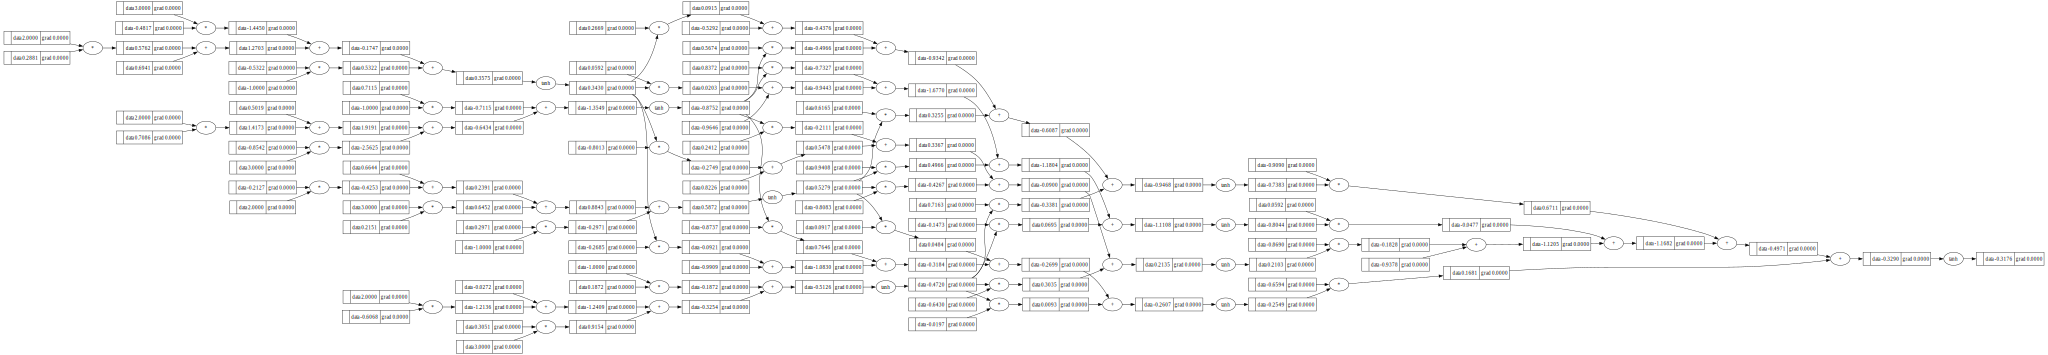

In [20]:
draw_dot(n(x))

---
---
---
## Creating a tiny Dataset  
## Writing the loss function

In [21]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [22]:
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.31758403218930287),
 Value(data=-0.5198083164593772),
 Value(data=-0.7482140329368582),
 Value(data=-0.12527297444659258)]

### Loss Function

A loss function, also known as a cost function or objective function, quantifies the discrepancy between the predicted values of a model and the actual values in the training data. Its primary role is to measure how well the model is performing on a given task, such as classification or regression.

#### Key Points:

1. **Evaluation of Performance**: The loss function provides a measure of how well a model is performing. By comparing the model's predictions to the ground truth labels or values, the loss function quantifies the model's accuracy or error.

2. **Optimization**: During training, the goal is to minimize the loss function. This optimization process involves adjusting the parameters of the model (e.g., weights in neural networks) to reduce the discrepancy between predicted and actual values, thereby improving the model's performance.

3. **Different Types**: There are various types of loss functions, each suited to different types of tasks. For example, mean squared error (MSE) is commonly used for regression tasks, while cross-entropy loss is often used for classification tasks.

4. **Gradient Descent**: The gradient of the loss function with respect to the model parameters guides the optimization process. Techniques like gradient descent are used to iteratively update the parameters in the direction that minimizes the loss.

5. **Interpretation**: A low value of the loss function indicates that the model's predictions are close to the ground truth values, while a high value indicates a significant discrepancy. Understanding the loss function helps in interpreting the performance of machine learning models.

6. **Model Training**: Loss functions are essential for training machine learning models. They form the basis of optimization algorithms like gradient descent, enabling models to learn from data and improve their performance over time.

In summary, the loss function serves as a crucial metric for evaluating and optimizing machine learning models, guiding the training process towards achieving better performance on the given task.

### Mean Square Error (MSE)

Mean Square Error (MSE) is a metric used to evaluate the performance of regression models. It measures the average squared difference between the actual and predicted values.

The formula for MSE is:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$

#### A lower MSE indicates better predictive performance of the model.


In [23]:
[(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]
# higher values indicates ypred is far away from  desired ys, therefore high loss

[Value(data=1.7360276818802218),
 Value(data=0.23058405294157763),
 Value(data=0.06339617320992154),
 Value(data=1.2662392670198819)]

In [24]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=3.296247175051603)

In [25]:
loss.backward()

In [26]:
# a single parameter
n.layers[0].neurons[0].w[0].grad

-3.484298150134485

This above expression refers to the gradient of the weight parameter of the first neuron in the first layer of a neural network `n`. Let's break it down:

- `n`: Refers to the neural network object.
- `layers[0]`: Refers to the first layer of the neural network.
- `neurons[0]`: Refers to the first neuron in the first layer.
- `w[0]`: Refers to the weight parameter of the first neuron.
- `grad`: Refers to the gradient of the weight parameter, which is used in the backpropagation algorithm to update the weights during training.

In summary, `n.layers[0].neurons[0].w[0].grad` accesses the gradient of the weight parameter of the first neuron in the first layer of the neural network `n`.


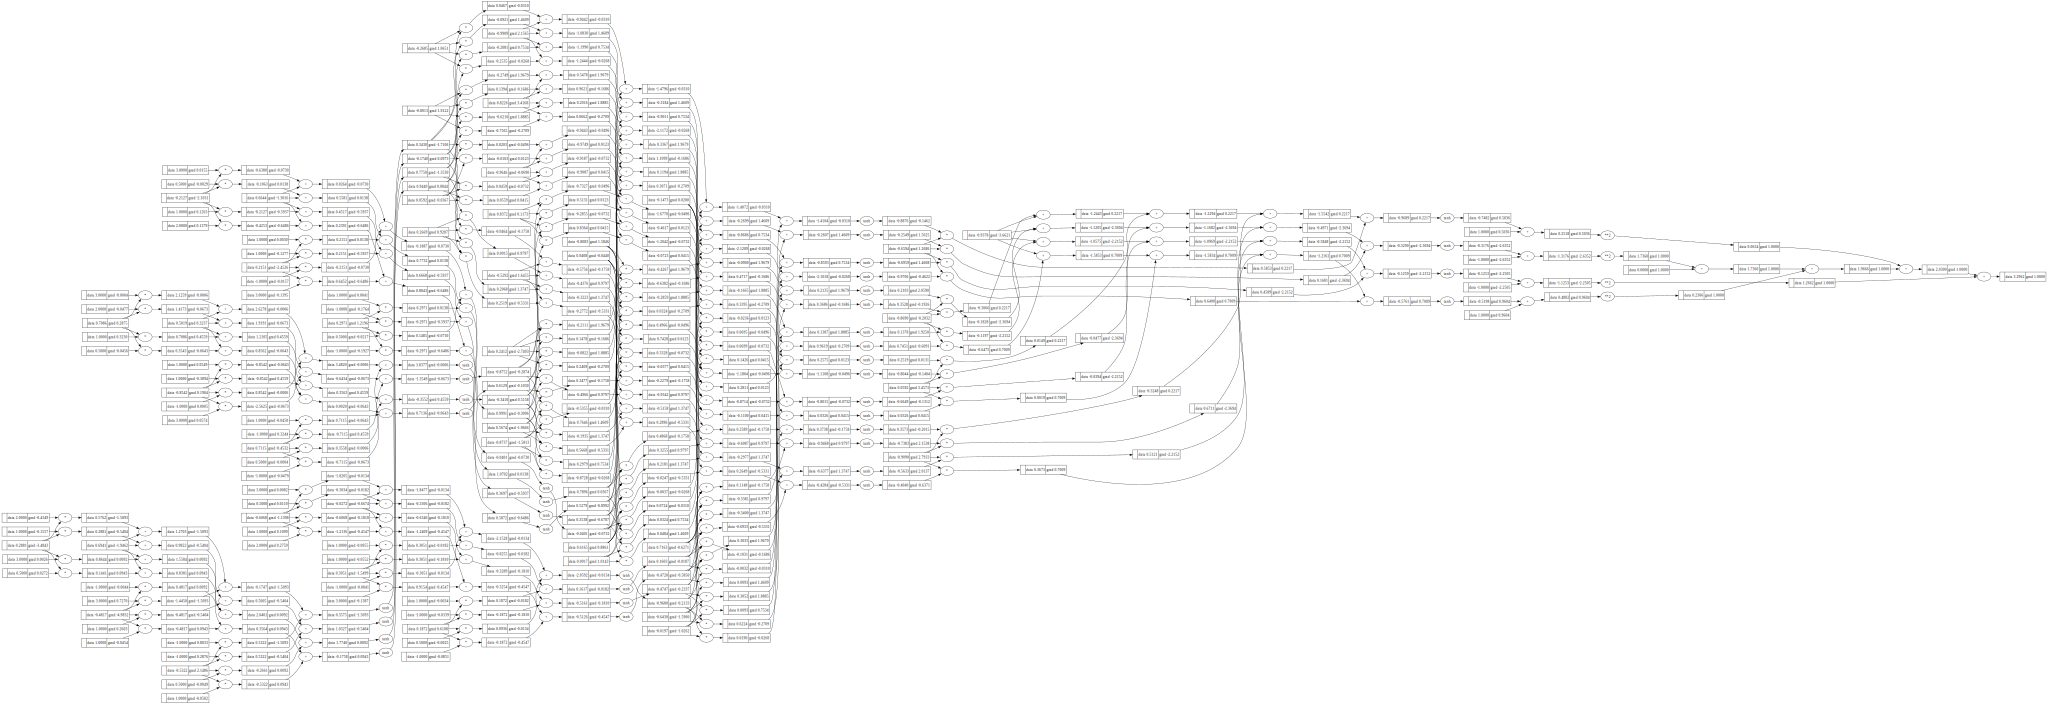

In [27]:
draw_dot(loss)

## Collecting all the parameters of Neural Network

In [28]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] 
        self.b = Value(np.random.uniform(-1,1))        
    def __call__(self, x):
        act = sum((wi*xi for wi,xi in zip(self.w, x)), start=self.b) 
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    def __call__(self, x):
        outs =  [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs
    def parameters(self):
        # params = []
        # for neuron in self.neurons:
        #     ps = neuron.parameters()
        #     params.extend(ps)
        # return params
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
    
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]          
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):
        # params = []
        # for layer in self.layers:
        #     ps = layer.parameters()
        #     params.extend(ps)
        # return params
        return [p for layer in self.layers for p in layer.parameters()]

In [29]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.8636639009265011)

In [30]:
n.parameters()[:5]

[Value(data=0.29894667950375986),
 Value(data=0.7502863736906304),
 Value(data=0.7961693911891201),
 Value(data=0.29832198852716374),
 Value(data=-0.48481874311163753)]

In [31]:
len(n.parameters())

41

---


### Gradient Descent Optimization

## Gradient Descent

Gradient Descent is an iterative optimization algorithm used for finding the minimum of a function. It's commonly used in machine learning for training models, particularly in optimization tasks like minimizing the loss function.

### Working Principle:

1. **Initialize Parameters**: Start with an initial guess for the parameters of the model.

2. **Compute Gradient**: Calculate the gradient of the loss function with respect to each parameter. The gradient points in the direction of the steepest increase of the function.

3. **Update Parameters**: Adjust the parameters in the opposite direction of the gradient to minimize the loss function. This step involves subtracting a fraction of the gradient from the current parameter values.

4. **Repeat**: Iterate steps 2 and 3 until convergence criteria are met, such as reaching a specified number of iterations or the change in the loss function becoming sufficiently small.

### Types of Gradient Descent:

- **Batch Gradient Descent**: Computes the gradient of the loss function with respect to the entire dataset.
  
- **Stochastic Gradient Descent (SGD)**: Computes the gradient of the loss function with respect to a single data point randomly chosen from the dataset.
  
- **Mini-Batch Gradient Descent**: Computes the gradient of the loss function with respect to a small batch of data points randomly chosen from the dataset.

### Advantages:

- Simplicity and ease of implementation.
- Ability to handle large datasets efficiently.
- Convergence to a local minimum, often a global minimum with appropriate learning rate and initialization.

### Limitations:

- Sensitive to learning rate selection.
- May converge to local minima or saddle points.
- Not suitable for non-convex or discontinuous loss functions.

Gradient Descent is a fundamental optimization technique widely used in machine learning for training various models, including neural networks.


#### Tiny Dataset

In [32]:
# (3, [4,4,1]) - 3 inputs (neuron) and 2 layers with 4 neurons and 1 output neuron
n = MLP(3, [4, 4, 1]) # n = MLP Object 

In [33]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [34]:
# forward pass through the network
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

ypred:  [Value(data=0.4516597802485996), Value(data=0.3173016655858083), Value(data=0.20224839435554107), Value(data=0.3647666579858615)]

loss:  Value(data=3.884883275289087)


In [35]:
# all gradients will be zero since we haven't run backward pass on the network yet
n.layers[0].neurons[0].w[0].grad

0.0

In [36]:
# backward pass through the network
# here we calculate the gradients 
loss.backward()

#### but we need to set all the gradients to zero before running the backward pass from next time onwards 
#### since network will have some gradiets after the forward pass next time while improving the Network
#### so in that case code will be
#### firstly setting all the gradients to zero and then running the backward pass
```python
for p in n.parameters():
        p.grad = 0.0
loss.backward()
```

In [37]:
n.layers[0].neurons[0].w[0].grad

-2.5871282735325103

In [38]:
# before:
n.layers[0].neurons[0].w[0].data

-0.2404740221815409

In [39]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [40]:
# after:
# slightly change in value
# i.e. it will decrease/increase the data/value according to gradient 
# "n.layers[0].neurons[0].w[0].grad" gradient tells whether to increase or decrease
# the data/value "n.layers[0].neurons[0].w[0].data" 

# if gradient is negative then data/value should be increase since it tells us that increasing more negative will minimize loss
# if gradient is positve then data/value should be decrease since it tells us that decreasing more positive will minimize loss
n.layers[0].neurons[0].w[0].data

-0.2146027394462158

In [41]:
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

ypred:  [Value(data=0.40191114315066157), Value(data=0.1981886324920602), Value(data=0.11724150901940607), Value(data=0.3019175129696992)]

loss:  Value(data=3.5289140278949116)


#### Now here above we can see that loss has been decrease by some amount/portion

---
---

### Now let's iterate this process manually unless we minimized the loss 
### At each iteration the Neural Network is improving its prediction

### Step 1:

In [42]:
# forward pass through the network
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

ypred:  [Value(data=0.40191114315066157), Value(data=0.1981886324920602), Value(data=0.11724150901940607), Value(data=0.3019175129696992)]

loss:  Value(data=3.5289140278949116)


In [43]:
# backward pass through the network
# here we calculate the gradients 
for p in n.parameters():
        p.grad = 0.0
loss.backward()

In [44]:
# step size
# OR update the whole Network (i.e. parameters/weights)
for p in n.parameters():
    p.data += -0.01 * p.grad

### Step 2:

In [45]:
# forward pass
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

# backward pass
for p in n.parameters():
        p.grad = 0.0
loss.backward()

# step size
for p in n.parameters():
    p.data += -0.01 * p.grad

ypred:  [Value(data=0.36547704471656794), Value(data=0.08932538837563099), Value(data=0.043519732840553674), Value(data=0.2522888452992371)]

loss:  Value(data=3.2372545862329085)


### Step 3:

In [46]:
# forward pass
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

# backward pass
for p in n.parameters():
        p.grad = 0.0
loss.backward()

# step size
for p in n.parameters():
    p.data += -0.01 * p.grad

ypred:  [Value(data=0.3446934100866417), Value(data=0.0029713328778081267), Value(data=-0.017907936010691267), Value(data=0.219482375469085)]

loss:  Value(data=3.009090805712724)


### Step 4:

In [47]:
# forward pass
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

# backward pass
for p in n.parameters():
        p.grad = 0.0
loss.backward()

# step size
for p in n.parameters():
    p.data += -0.01 * p.grad

ypred:  [Value(data=0.3377978290655661), Value(data=-0.059963287273116686), Value(data=-0.06857566771955208), Value(data=0.2021915652463017)]

loss:  Value(data=2.826230321792867)


### Step 5:

In [48]:
# forward pass
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

# backward pass
for p in n.parameters():
        p.grad = 0.0
loss.backward()

# step size
for p in n.parameters():
    p.data += -0.01 * p.grad

ypred:  [Value(data=0.3410791983898478), Value(data=-0.10503821382997872), Value(data=-0.11091274450232126), Value(data=0.1965063406425457)]

loss:  Value(data=2.6712114300152283)


### Step 6:

In [49]:
# forward pass
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

# backward pass
for p in n.parameters():
        p.grad = 0.0
loss.backward()

# step size
for p in n.parameters():
    p.data += -0.01 * p.grad

ypred:  [Value(data=0.35104194042032594), Value(data=-0.1382327204635561), Value(data=-0.1471213765714598), Value(data=0.19856637951937364)]

loss:  Value(data=2.5334872015111056)


### Step 7:

In [50]:
# forward pass
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

# backward pass
for p in n.parameters():
        p.grad = 0.0
loss.backward()

# step size
for p in n.parameters():
    p.data += -0.01 * p.grad

ypred:  [Value(data=0.36511989888918606), Value(data=-0.16393158133403135), Value(data=-0.1788651496191767), Value(data=0.20551917948008322)]

loss:  Value(data=2.407545360161028)


### Step 8:

In [51]:
# forward pass
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

# backward pass
for p in n.parameters():
        p.grad = 0.0
loss.backward()

# step size
for p in n.parameters():
    p.data += -0.01 * p.grad

ypred:  [Value(data=0.38159546496802954), Value(data=-0.1849855647193783), Value(data=-0.20732092749853465), Value(data=0.21548031784171653)]

loss:  Value(data=2.290483942339416)


---
### Now we can see that the loss has been minimized significantly.
### And also we have managed to adjust the parameters/weights of the Network according to the desired targets 
### But this manual optimization is not feasible

In [52]:
ypred = [n(x) for x in xs]
print("ypred: ", ypred)

loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print("\nloss: ", loss)

ypred:  [Value(data=0.39935283500087), Value(data=-0.20317851067490866), Value(data=-0.2333040312849848), Value(data=0.22725899401243216)]

loss:  Value(data=2.180652873450283)


In [53]:
# This is the setting of weights and biases
n.parameters()

[Value(data=-0.09236518556674185),
 Value(data=-0.3414250024669295),
 Value(data=0.18102606927642548),
 Value(data=0.7255779324296764),
 Value(data=0.8091903567202767),
 Value(data=-0.1583423233217715),
 Value(data=-0.7120276764370238),
 Value(data=-0.8115113767330411),
 Value(data=0.9069200537619078),
 Value(data=-0.059487012064367094),
 Value(data=-0.18678555857834106),
 Value(data=0.11222485591453606),
 Value(data=0.014594264603496629),
 Value(data=-0.08274185066340684),
 Value(data=-0.2851485138071516),
 Value(data=0.32113783497665965),
 Value(data=-0.10659962199813272),
 Value(data=0.12775313337439115),
 Value(data=0.06672970424986154),
 Value(data=0.08142950571937789),
 Value(data=0.02633750794641075),
 Value(data=-0.8767105754052693),
 Value(data=-0.9509914257546),
 Value(data=-0.829411218216228),
 Value(data=-0.3583653060713451),
 Value(data=0.4675866767034543),
 Value(data=0.8794402547931269),
 Value(data=0.4299015593275032),
 Value(data=0.2713525153189973),
 Value(data=0.1315

---
---
---
---
---


## Now let's completely reinitialize the Neural Network

In [54]:
# (3, [4,4,1]) - 3 inputs (neuron) and 2 layers with 4 neurons and 1 output neuron
n = MLP(3, [4, 4, 1]) # n = MLP Object 

In [55]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [56]:
for i in range(100):
    
    # forwarde pass
    ypred = [n(x) for x in xs]
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
    
    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    
    # update parameters
    for p in n.parameters():
        p.data += -0.1 * p.grad
        
    print(i, loss.data)

0 4.764555853833409
1 4.208004203279781
2 4.444734773439082
3 3.1639980533396184
4 2.7119786064034
5 2.643238306351483
6 2.5990393186759033
7 2.5369293179324357
8 2.4831310986404302
9 2.4098796402453515
10 2.3574589857727597
11 2.2808966705468237
12 2.2327457163842626
13 2.105975483176895
14 1.9229435436637454
15 1.2379429233088404
16 1.5790303907073713
17 0.3170985421598559
18 0.16944494036304264
19 0.1362130266365044
20 0.11436630982069106
21 0.09840495528545122
22 0.08616139123328101
23 0.0764722193834988
24 0.0686246490813796
25 0.062149899162205716
26 0.056725187660664374
27 0.052120637599147326
28 0.048168101795219825
29 0.04474183070116722
30 0.04174598838836537
31 0.03910632769730731
32 0.03676448927187684
33 0.03467400788081391
34 0.032797458919177805
35 0.031104383660284892
36 0.02956975700375419
37 0.028172839839205887
38 0.026896308435499415
39 0.025725586240142623
40 0.024648325515400353
41 0.023654001229704767
42 0.02273358998226104
43 0.021879314000982933
44 0.0210844354

In [57]:
n.parameters()[:5]

[Value(data=-0.2516873672789252),
 Value(data=1.2083993015868846),
 Value(data=0.6226714625331227),
 Value(data=0.628338393598678),
 Value(data=-1.10712262084253)]

In [58]:
# desired targets
ys 

[1.0, -1.0, -1.0, 1.0]

In [59]:
# yout 
ypred

[Value(data=0.9633604279751715),
 Value(data=-0.9590703578229453),
 Value(data=-0.9469567325512003),
 Value(data=0.9687665818354176)]

---
---
---
---
---

## Now let's completely reinitialize the Neural Network with a 
## New Desired Targets

In [60]:
# (3, [4,4,1]) - 3 inputs (neuron) and 2 layers with 4 neurons and 1 output neuron
n = MLP(3, [4, 4, 1]) # n = MLP Object 

In [61]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [-1.0, 0.0, 0.5, 1.0] # new desired targets

In [62]:
for i in range(10000):
    
    # forwarde pass
    ypred = [n(x) for x in xs]
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
    
    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    
    # update parameters
    for p in n.parameters():
        p.data += -0.05 * p.grad
        
print("loss = ", loss.data)

loss =  0.00013695535684607436


In [63]:
n.parameters()[:5]

[Value(data=0.9678280714134976),
 Value(data=-0.149364541549272),
 Value(data=-0.6775934863304514),
 Value(data=0.7472612050476198),
 Value(data=-0.7504611113587544)]

In [64]:
# desired targets
ys 

[-1.0, 0.0, 0.5, 1.0]

In [65]:
# yout 
ypred

[Value(data=-0.9945153877903872),
 Value(data=0.006780575574145105),
 Value(data=0.505320690383607),
 Value(data=0.9942913719265187)]

---

### Let's Summarize Everything

# Understanding Neural Networks

Neural networks, or neural nets, are mathematical expressions—often simple in the case of a multi-layer perceptron—that take input data along with weights and parameters. 

These expressions undergo a series of steps:

1. **Forward Pass**: The input data is processed through the network.
   
2. **Loss Evaluation**: An evaluation using a loss function is performed. The loss function measures the accuracy of predictions, where lower loss indicates better alignment between predictions and targets. This signifies desirable behavior of the network.
   
3. **Adjustment of Loss Function**: The loss function is adjusted to align network behavior with desired outcomes for a given problem.

Following the forward pass and loss evaluation, backpropagation is employed to calculate gradients. These gradients inform adjustments to parameters with the goal of locally decreasing the loss. This iterative process is known as gradient descent, where the network follows gradient information to minimize loss.

Ultimately, the loss function is structured such that minimizing loss corresponds to the network performing optimally for the given task.


---